# A study on em🌳jis and weed

Starting from the document http://www.hempyreum.org/en/72640 using the [PDF](http://www.gallup.com/file/poll/196556/161019LegalMarijuana.pdf)

## PdfMiner

Use pdfminer3k - the python 3 fork of pdfminer to parse the document from 

In [33]:
    %%bash
    pip install git+https://github.com/jaepil/pdfminer3k
    pdf2txt.py ../../Downloads/161019LegalMarijuana.pdf > legal.txt

### Split the parsed text

In [167]:
    from fidget import a, the, stars
    from wip.clsindex import PathIndex

    blob = PathIndex('legal.txt').read_text().str.split('Do you think the use of marijuana should be made legal, or not\?').apply(the.last()).str.strip()[0].replace('\n^ Asked of a half sample. \n', '')

    *columns, blob = blob.split('\n'*2, 3)

### Chop it up further into a dataframe

In [168]:
from pandas import *
df = the[the.enumerate().groupby(
    the.first()[lambda x: x//(1+(len(blob.splitlines())//4))]
)].valmap(a.pluck(1).list())[dict.values].list()[Series](blob.splitlines()).apply(Series).T
df = df[df.astype(bool).all(axis=1)]
df[0] = df[0].str.rstrip(' ^ ').str.split('-', 1).apply(the.first()).pipe(to_datetime, format="%Y %b %d")
df, df.columns = df.set_index(0).astype(int), list('+-~')
df.index.rename('time', inplace=True)
df.sample(10).T

time,2015-10-07 00:00:00,2005-10-13 00:00:00,1973-01-26 00:00:00,2001-08-03 00:00:00,2000-08-29 00:00:00,1969-10-02 00:00:00,1972-03-03 00:00:00,2009-10-01 00:00:00,2012-11-26 00:00:00,1985-05-17 00:00:00
+,58,36,16,34,31,12,15,44,48,23
-,40,60,78,62,64,84,81,54,50,73
~,2,4,6,4,5,4,4,2,1,4


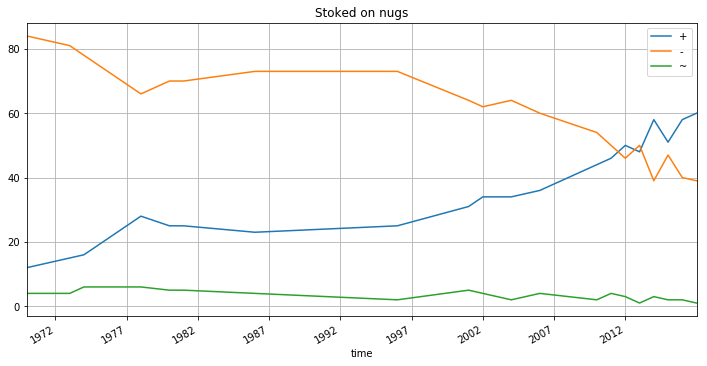

In [169]:
%matplotlib inline
df.groupby(TimeGrouper('A')).sum().pipe(lambda df: df[df.gt(0).all(axis=1)]
                                       ).plot(title='Stoked on nugs', figsize=(12,6), grid=True);

## To do

* emojis
* munge half `^` token